In [42]:
import pandas as pd
import numpy as np
from ProgSnap2 import ProgSnap2Dataset
from ProgSnap2 import PS2
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import os
from os import path

In [43]:
train_folder = "C:/Users/Jesper/Google Drive/Uni docs/Statistik/Masterarbeit/Daten/csedm_challenge_dataset/F19_Release_Train_06-28-21/Train"

In [44]:
#Snippet from "naive_model.ipynb". 
#Defining the path and semester
semester = 'S19'
BASE_PATH = os.path.join('C:/Users/Jesper/Google Drive/Uni docs/Statistik/Masterarbeit/Daten/csedm_challenge_dataset', 'F19_Release_Train_06-28-21')
TRAIN_PATH = os.path.join(BASE_PATH, 'Train')

In [45]:
#Setting up a ProgSnap2 Dataset (this is the data format used in the Challenge.)
train_ps2 = ProgSnap2Dataset(os.path.join(TRAIN_PATH, 'Data')) 

## Event Analysis

In [46]:
#Table of all Course Events
events = train_ps2.get_main_table()
events

,SubjectID,ToolInstances,ServerTimestamp,ServerTimezone,CourseID,AssignmentID,ProblemID,CodeStateID,IsEventOrderingConsistent,EventType,Score,Compile.Result,CompileMessageType,CompileMessageData,EventID,Order,ParentEventID
0,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,Java 8; CodeWorkout,2019-09-30T18:05:13,0,CS 1,439,1,79c9e2da9bc703116d8768297056db22866c43d583e529...,True,Run.Program,1.000000,NaN,NaN,NaN,179362,179362,NaN
1,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,Java 8; CodeWorkout,2019-09-30T18:05:13,0,CS 1,439,1,79c9e2da9bc703116d8768297056db22866c43d583e529...,True,Compile,NaN,Success,NaN,NaN,179363,179363,179362.0
2,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,Java 8; CodeWorkout,2019-09-30T18:07:55,0,CS 1,439,3,0e91ae5696da0d6a724380360147b8699a25c14ff46227...,True,Run.Program,1.000000,NaN,NaN,NaN,179364,179364,NaN
3,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,Java 8; CodeWorkout,2019-09-30T18:07:55,0,CS 1,439,3,0e91ae5696da0d6a724380360147b8699a25c14ff46227...,True,Compile,NaN,Success,NaN,NaN,179365,179365,179364.0
4,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,Java 8; CodeWorkout,2019-09-30T18:00:06,0,CS 1,439,5,1b38c7b1c7ebca281bbbc270d1b896484de663045c715f...,True,Run.Program,1.000000,NaN,NaN,NaN,179358,179358,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262377,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,Java 8; CodeWorkout,2019-12-02T15:25:42,0,CS 1,502,112,add860149e169c4e0ef359e8523a475bff1cb35185d799...,True,Compile,NaN,Success,NaN,NaN,458825,458825,458824.0
262378,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,Java 8; CodeWorkout,2019-12-02T15:28:24,0,CS 1,502,118,e93270dbbeb99d37024546a81c424ca7ac89255c5ab3d4...,True,Run.Program,0.909091,NaN,NaN,NaN,458826,458826,NaN
262379,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,Java 8; CodeWorkout,2019-12-02T15:28:24,0,CS 1,502,118,e93270dbbeb99d37024546a81c424ca7ac89255c5ab3d4...,True,Compile,NaN,Success,NaN,NaN,458827,458827,458826.0
262380,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,Java 8; CodeWorkout,2019-12-02T15:28:51,0,CS 1,502,118,38e11aa1c182ae86953bcf1b435fd1a7e9decdb7434aee...,True,Run.Program,1.000000,NaN,NaN,NaN,458828,458828,NaN


In [47]:
#Are there different Courses?
events["CourseID"].value_counts()
#no

CS 1    262398
Name: CourseID, dtype: int64

In [48]:
#Which Events aere in the Data?
events["EventType"].value_counts(dropna=False)

Run.Program      91751
Compile          91751
Compile.Error    78896
Name: EventType, dtype: int64

In [49]:
#How many and which Assignments and Tasks do we have in the Data?
events["ProblemID"].groupby(events["AssignmentID"]).value_counts()

AssignmentID  ProblemID
439           13           13346
              232           9906
              236           6099
              3             4976
              233           4565
              5             3924
              234           3856
              235           3794
              1             2514
              12            1898
487           102          11974
              101          11597
              24            8143
              25            7186
              100           6034
              28            5481
              22            3850
              20            3322
              21            2534
              17            1978
492           40            9224
              32            9014
              38            8798
              34            7789
              128           6801
              33            5497
              39            4834
              36            4825
              37            4513
              31   

In [50]:
#Which scores can one get?
events["Score"].value_counts(dropna=False)
#Everything between 0 and 1. 
#Question: How is the Score derived?

NaN         170647
0.000000     39730
1.000000     18279
0.500000      1042
0.272727       978
             ...  
0.678571         1
0.535714         1
0.347826         1
0.173913         1
0.217391         1
Name: Score, Length: 212, dtype: int64

In [51]:
#How many students do we have?
len(events["SubjectID"].unique())

367

## Overview of Task-Performance

In [52]:
early = pd.read_csv(os.path.join(TRAIN_PATH, 'early.csv'))
early["alt_Label"] = early.apply(lambda x: 1 if (x["CorrectEventually"] and x["Attempts"] <= 3) else 0, axis=1)
early

,SubjectID,AssignmentID,ProblemID,Attempts,CorrectEventually,Label,alt_Label
0,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,439,1,1,True,True,1
1,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,439,3,1,True,True,1
2,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,439,5,1,True,True,1
3,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,439,12,1,True,True,1
4,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,439,13,1,True,True,1
...,...,...,...,...,...,...,...
10652,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,492,37,1,True,True,1
10653,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,492,38,8,True,True,0
10654,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,492,39,3,True,True,1
10655,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,492,40,8,False,False,0


(array([7.940e+03, 1.318e+03, 6.840e+02, 2.840e+02, 1.900e+02, 8.800e+01,
        5.500e+01, 2.700e+01, 2.000e+01, 1.000e+01, 1.100e+01, 1.300e+01,
        4.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00]),
 array([  1. ,   6.5,  12. ,  17.5,  23. ,  28.5,  34. ,  39.5,  45. ,
         50.5,  56. ,  61.5,  67. ,  72.5,  78. ,  83.5,  89. ,  94.5,
        100. , 105.5, 111. ]),
 <BarContainer object of 20 artists>)

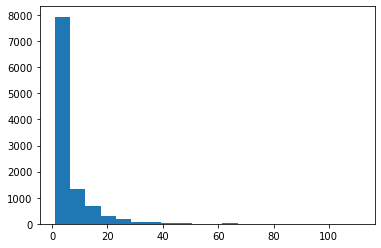

In [53]:
#How is the number of attempts in early set distributed?
plt.hist(early["Attempts"], bins=20)
#Probably Poisson-Distribution

In [54]:
#How is the Label distributed?
early["Label"].value_counts()

True     7942
False    2715
Name: Label, dtype: int64

In [55]:
#Are ther very difficult exercise?
early["Label"].groupby([early["AssignmentID"], early["ProblemID"]]).value_counts()
#Not so much by definition of the Label
#Maybe change definition of label for prediction of grade!

AssignmentID  ProblemID  Label
439           1          True     302
                         False     58
              3          True     276
                         False     83
              5          True     282
                         False     80
              12         True     284
                         False     75
              13         True     280
                         False     85
              232        True     284
                         False     78
              233        True     273
                         False     87
              234        True     283
                         False     79
              235        True     275
                         False     87
              236        True     274
                         False     88
487           17         True     277
                         False     74
              20         True     286
                         False     65
              21         True     281
                   

In [56]:
#How often do Correct Eventually and Label differ?
(early["CorrectEventually"] == early["Label"]).value_counts()
#The Label is unequal to Correct Eventually, if the respondend needed more Attenpts than 75% of her peers. 

True     8569
False    2088
dtype: int64

## Subject Level DF

In [57]:
#Function from "naive_model.ipynb"
#Changed to use subject_id
def extract_instance_features(subject_id, early_df):
    instance = pd.DataFrame(data=[subject_id], columns=["SubjectID"])
    early_problems = early_df[early_df["SubjectID"] == subject_id]
    # Extract very naive features about the student
    # (without respect to the problem bring predicted)
    # Number of early problems attempted
    instance['ProblemsAttempted'] = early_problems.shape[0]
    # Percentage of early problems gotten correct eventually
    instance['PercCorrectEventually'] = np.mean(early_problems['CorrectEventually'])
    # Median attempts made on early problems
    instance['MedAttempts'] = np.median(early_problems['Attempts'])
    # Max attempts made on early problems
    instance['MaxAttempts'] = np.max(early_problems['Attempts'])
    # Percentage of problems gotten correct on the first try
    instance['PercCorrectFirstTry'] = np.mean(early_problems['Attempts'] == 1)
    #instance = instance.drop('SubjectID')
    instance['PercLabelledTrue'] = np.mean(early_problems["Label"] == 1)
    instance['PercAltLabelTrue'] = np.mean(early_problems["alt_Label"] == 1)
    return instance

In [58]:
extract_instance_features(early["SubjectID"][10], early)

,SubjectID,ProblemsAttempted,PercCorrectEventually,MedAttempts,MaxAttempts,PercCorrectFirstTry,PercLabelledTrue,PercAltLabelTrue
0,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,30,0.966667,3.0,22,0.333333,0.833333,0.6


In [59]:
def make_subject_df(task_level_data):
    subjects = task_level_data["SubjectID"].unique()
    subject_df = pd.DataFrame(columns=["SubjectID", "ProblemsAttempted", "PercCorrectEventually", "MedAttempts", "MaxAttempts", "PercCorrectFirstTry", "PercLabelledTrue", "PercAltLabelTrue"])
    for subject in subjects:
        instance_data = extract_instance_features(subject, task_level_data)
        subject_df = subject_df.append(instance_data)
    return(subject_df)


In [60]:
subject_df = make_subject_df(early)
subject_df

,SubjectID,ProblemsAttempted,PercCorrectEventually,MedAttempts,MaxAttempts,PercCorrectFirstTry,PercLabelledTrue,PercAltLabelTrue
0,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,30,0.966667,3.0,22,0.333333,0.833333,0.600000
0,01e96e066eff2e82627dac0493737be2de9bd2f50d6d49...,20,0.750000,4.0,15,0.300000,0.650000,0.450000
0,03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b0...,30,0.966667,3.0,45,0.333333,0.766667,0.533333
0,0461c96c9cc0058f709704605f24136f373ba4e9ac083a...,29,0.896552,6.0,22,0.103448,0.517241,0.310345
0,048fce7bd5670d2ce6215f41856aea059973fb280ce106...,30,1.000000,3.5,26,0.333333,0.833333,0.500000
...,...,...,...,...,...,...,...,...
0,fe545219144abfb405c64d3fed4f32dc348ece7afb0a81...,30,1.000000,2.0,26,0.466667,0.900000,0.600000
0,ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b53...,30,1.000000,4.0,38,0.266667,0.633333,0.433333
0,ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4...,30,0.933333,3.5,34,0.233333,0.800000,0.500000
0,ff86d28801139f82f29ac25c715647674d50977478b8d8...,30,1.000000,3.0,31,0.266667,0.866667,0.633333


In [61]:
#What is the percent of Average correct Answers 
np.mean(subject_df["PercCorrectEventually"])

0.9371397887907342

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,
          4.,   4.,   3.,   2.,  13.,  25.,  16.,  56., 240.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

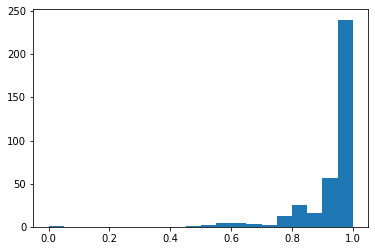

In [62]:
plt.hist(subject_df["PercCorrectEventually"], bins=20)

In [63]:
#What is the Average of correct Anwer on first try?
np.mean(subject_df["PercCorrectFirstTry"])

0.31904243814476974

(array([26., 81., 89., 67., 34., 21., 21., 12.,  9.,  7.]),
 array([0.        , 0.09666667, 0.19333333, 0.29      , 0.38666667,
        0.48333333, 0.58      , 0.67666667, 0.77333333, 0.87      ,
        0.96666667]),
 <BarContainer object of 10 artists>)

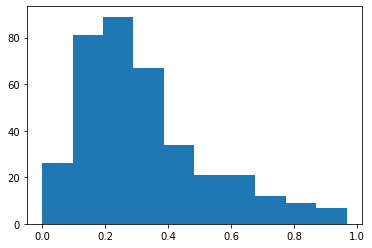

In [64]:
plt.hist(subject_df["PercCorrectFirstTry"])

In [65]:
#What is teh Average of being labelled as True?
np.mean(subject_df["PercLabelledTrue"])

0.7423874802013036

(array([ 1.,  3.,  2.,  5., 18., 52., 65., 51., 79., 91.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

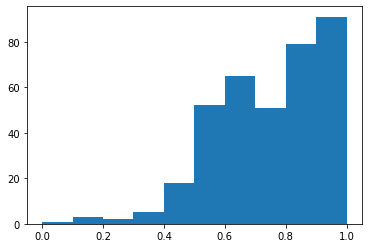

In [66]:
plt.hist(subject_df["PercLabelledTrue"])
#Es scheint hier durchaus viel Varianz zu geben!

In [67]:
np.mean(subject_df["PercAltLabelTrue"])

0.5595540475247396

(array([70., 83., 61., 63., 19., 30., 13., 13.,  5.,  3.,  2.,  2.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([ 1.   ,  1.775,  2.55 ,  3.325,  4.1  ,  4.875,  5.65 ,  6.425,
         7.2  ,  7.975,  8.75 ,  9.525, 10.3  , 11.075, 11.85 , 12.625,
        13.4  , 14.175, 14.95 , 15.725, 16.5  ]),
 <BarContainer object of 20 artists>)

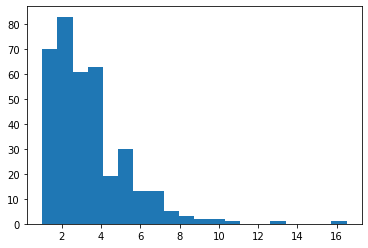

In [68]:
#How is the number of Attempts distributed?
plt.hist(subject_df["MedAttempts"], bins=20)

## Simple UIRT Model for early ability with labels as answer-codes

In [69]:
#Obtain Matrix of Response-vectors
U = pd.crosstab(index = early["SubjectID"], 
            columns=[early["AssignmentID"], early["ProblemID"]], 
            values=early["Label"],
            aggfunc="sum")
#At the moment we will delete missing values row-wise. It will be usefull to impute values later, since missing at random is unlikely
U = U.dropna()
U


AssignmentID                                        439                      \
ProblemID                                           1    3    5    12   13    
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  1.0  1.0  1.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  1.0  0.0  1.0  1.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  0.0  0.0  1.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  1.0  1.0  1.0  1.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  1.0  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  1.0  1.0  1.0  0.0  1.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  0.0  0.0  1.0  0.0  1.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  1.0  1.0  1.0  1.0  0.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  1.0  1.0  1.0  1.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  1.0  1.0  1.0  1.0  1.0   

AssignmentID                                                                 \
ProblemID                                           232  233  234  235  236   
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  1.0  1.0  1.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  1.0  1.0  0.0  1.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  0.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  0.0  1.0  1.0  1.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  1.0  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  1.0  1.0  1.0  1.0  1.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  1.0  1.0  0.0  1.0  1.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  0.0  1.0  1.0  0.0  1.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  1.0  1.0  0.0  0.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  1.0  1.0  1.0  1.0  1.0   

AssignmentID                                        ...  492                 \
ProblemID                                           ...  31   32   33   34    
SubjectID                                           ...                       
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  ...  1.0  0.0  0.0  0.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  ...  0.0  0.0  0.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  ...  1.0  1.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  ...  1.0  1.0  1.0  1.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  ...  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  ...  1.0  1.0  1.0  1.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  ...  1.0  0.0  1.0  0.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  ...  1.0  1.0  1.0  1.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  ...  1.0  0.0  1.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  ...  1.0  1.0  1.0  1.0   

AssignmentID                                                                 \
ProblemID                                           36   37   38   39   40    
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  0.0  1.0  1.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  1.0  1.0  0.0  1.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  1.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  1.0  1.0  1.0  1.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  1.0  1.0  1.0  1.0  1.0   
...                                            

In [70]:
#Obtain Matrix of Response-vectors
alt_U = pd.crosstab(index = early["SubjectID"], 
            columns=[early["AssignmentID"], early["ProblemID"]], 
            values=early["alt_Label"],
            aggfunc="sum")
#At the moment we will delete missing values row-wise. It will be usefull to impute values later, since missing at random is unlikely
alt_U = alt_U.dropna()
alt_U

AssignmentID                                        439                      \
ProblemID                                           1    3    5    12   13    
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  1.0  1.0  1.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  1.0  0.0  1.0  1.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  0.0  0.0  1.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  1.0  1.0  1.0  0.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  1.0  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  1.0  1.0  0.0  0.0  0.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  0.0  0.0  1.0  1.0  1.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  1.0  0.0  1.0  1.0  0.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  1.0  1.0  1.0  1.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  1.0  1.0  1.0  1.0  1.0   

AssignmentID                                                                 \
ProblemID                                           232  233  234  235  236   
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  1.0  0.0  1.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  0.0  0.0  0.0  1.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  0.0  1.0  0.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  0.0  1.0  1.0  1.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  1.0  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  0.0  0.0  0.0  0.0  0.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  1.0  1.0  0.0  1.0  1.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  0.0  1.0  1.0  0.0  1.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  0.0  1.0  0.0  0.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  1.0  1.0  1.0  1.0  1.0   

AssignmentID                                        ...  492                 \
ProblemID                                           ...  31   32   33   34    
SubjectID                                           ...                       
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  ...  1.0  0.0  0.0  0.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  ...  0.0  0.0  0.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  ...  0.0  0.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  ...  1.0  1.0  1.0  0.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  ...  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  ...  1.0  1.0  1.0  1.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  ...  0.0  0.0  0.0  0.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  ...  1.0  0.0  0.0  0.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  ...  1.0  0.0  0.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  ...  1.0  1.0  1.0  1.0   

AssignmentID                                                                 \
ProblemID                                           36   37   38   39   40    
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  0.0  1.0  0.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  0.0  1.0  0.0  0.0  0.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  0.0  1.0  0.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  0.0  0.0  1.0  0.0  1.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  1.0  1.0  1.0  1.0  1.0   
...                                            

In [71]:
#Are there inconsistent entry's in U?
np.where(U > 1.0)

(array([], dtype=int64), array([], dtype=int64))

In [72]:
#Define Item Characteristic Curve Function based on vectors a, b, theta. 
#!!! Make this consistent with multidims in theta and a,b
# def ICC(a, b, theta):
#     """_summary_

#     Args:
#         a (_type_): _description_
#         b (_type_): _description_
#         theta (_type_): _description_
#     """
#     sigma = 1/(1+np.exp(-np.multiply(a,(theta-b))))
#     return(sigma)

In [73]:
#Define Item Characteristic Curve Function based on vectors a, b, theta. 
#!!! Make this consistent with multidims in theta and a,b
def ICC(a, b, theta):
    """_summary_

    Args:
        a (_type_): _description_
        b (_type_): _description_
        theta (_type_): _description_
    """
    try: 
        item_dim = len(b)
    except Exception:
         item_dim = 1
    theta_expand = np.transpose(np.tile(theta, (item_dim, 1)))
    ability_item_product = np.subtract(theta_expand, b)
    sigma = 1/(1+np.exp(-np.multiply(a,(ability_item_product))))
    return(sigma)

In [74]:
#Define some random starting values for the 2PL Model
b = np.random.normal(loc=0, scale=1, size = U.shape[1])
theta = np.random.normal(loc=0, scale=1, size = U.shape[0])
a = np.random.uniform(low=0, high=2, size = U.shape[1])

In [75]:
ICC(a=a, b=b, theta=0.5)

array([[0.62378453, 0.40905951, 0.84608728, 0.97203352, 0.92197232,
        0.57319876, 0.72787671, 0.49242781, 0.25254837, 0.86687445,
        0.94070325, 0.76872369, 0.85409422, 0.56270509, 0.39210285,
        0.75922576, 0.54024225, 0.50667116, 0.83906098, 0.32473875,
        0.53414266, 0.5825554 , 0.95872356, 0.56885733, 0.72856012,
        0.63835816, 0.5623549 , 0.21048939, 0.54958547, 0.10891051]])

In [76]:
#Plot all ICC's according to their current parameters
def plot_iccs(a, b, range=[-5,5], step=0.2):
    for i, discrimination in enumerate(a):
        x = np.arange(start=range[0], stop=range[1], step=step)
        y = ICC(a[i], b[i], x)
        plt.plot(x,y)

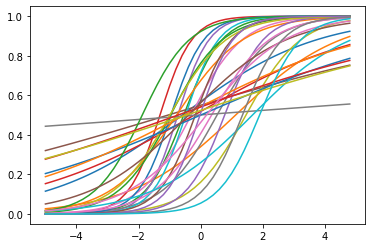

In [77]:
plot_iccs(a=a, b=b)

### Simple ML Parameter Estimation with fixed theta

In [78]:
#Define some random starting values for the 2PL Model
b = np.random.normal(loc=25, scale=1, size = U.shape[1])
a = np.random.uniform(low=0, high=2, size = U.shape[1])

theta = np.sum(U, axis=1)

In [79]:
#Function for calculating the log-likelihood of the data given the current paramater choices.
def uirt_log_likelihood(U, a, b, theta):
    likelihoods = np.empty(shape=theta.shape)
    ICC_values = ICC(a, b, theta)
    for i, u in enumerate(U.to_numpy()):
        likelihoods[i] = np.dot(u, np.log(ICC_values[i])) + np.dot((1-u), np.log(1-ICC_values[i]))
    return(np.sum(likelihoods)) 

In [80]:
uirt_log_likelihood(U, a, b, theta)
#Problem is underspecified, we need assumptions on theta to proceed

-19611.494100015454

In [81]:
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import NonlinearConstraint
from scipy.optimize import minimize

nll = lambda x: -1*uirt_log_likelihood(U=U, a=x[0:len(a)], b=x[len(a):len(x)], theta=theta)

#The Nelder-mead method is simplex based and does not need derivatives. To get better results other methods should be used. 
res = minimize(nll, x0=np.concatenate((a,b), axis=0), method='BFGS')
res

C:\Users\Jesper\AppData\Local\Temp\ipykernel_9548\2826448765.py:6: RuntimeWarning: divide by zero encountered in log
  likelihoods[i] = np.dot(u, np.log(ICC_values[i])) + np.dot((1-u), np.log(1-ICC_values[i]))
C:\Users\Jesper\AppData\Local\Temp\ipykernel_9548\2267335573.py:17: RuntimeWarning: overflow encountered in exp
  sigma = 1/(1+np.exp(-np.multiply(a,(ability_item_product))))
C:\Users\Jesper\AppData\Local\Temp\ipykernel_9548\2826448765.py:6: RuntimeWarning: divide by zero encountered in log
  likelihoods[i] = np.dot(u, np.log(ICC_values[i])) + np.dot((1-u), np.log(1-ICC_values[i]))
C:\Users\Jesper\AppData\Local\Temp\ipykernel_9548\2267335573.py:17: RuntimeWarning: overflow encountered in exp
  sigma = 1/(1+np.exp(-np.multiply(a,(ability_item_product))))
C:\Users\Jesper\AppData\Local\Temp\ipykernel_9548\2267335573.py:17: RuntimeWarning: overflow encountered in exp
  sigma = 1/(1+np.exp(-np.multiply(a,(ability_item_product))))
C:\Users\Jesper\AppData\Local\Temp\ipykernel_9548\28264

      fun: nan
 hess_inv: array([[ 1.07092997e+00,  7.13589223e-02, -3.56231233e-03, ...,
         1.69529418e-02,  3.07750049e-03,  1.17759912e-02],
       [ 7.13589223e-02,  1.07158294e+00, -7.25091010e-03, ...,
         1.67800920e-02,  2.71455504e-03,  1.15760536e-02],
       [-3.56231233e-03, -7.25091010e-03,  9.35381624e-01, ...,
        -5.71732389e-03, -6.89671720e-03, -5.38274711e-03],
       ...,
       [ 1.69529418e-02,  1.67800920e-02, -5.71732389e-03, ...,
         1.00368652e+00,  2.29255633e-04,  2.45477449e-03],
       [ 3.07750049e-03,  2.71455504e-03, -6.89671720e-03, ...,
         2.29255633e-04,  9.99432005e-01,  1.23982773e-05],
       [ 1.17759912e-02,  1.15760536e-02, -5.38274711e-03, ...,
         2.45477449e-03,  1.23982773e-05,  1.00160080e+00]])
      jac: array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

In [82]:
a_hat = res.x[0:len(a)]
b_hat = res.x[len(a): len(res.x)]

C:\Users\Jesper\AppData\Local\Temp\ipykernel_9548\2267335573.py:17: RuntimeWarning: overflow encountered in exp
  sigma = 1/(1+np.exp(-np.multiply(a,(ability_item_product))))
C:\Users\Jesper\AppData\Local\Temp\ipykernel_9548\2267335573.py:17: RuntimeWarning: overflow encountered in exp
  sigma = 1/(1+np.exp(-np.multiply(a,(ability_item_product))))
C:\Users\Jesper\AppData\Local\Temp\ipykernel_9548\2267335573.py:17: RuntimeWarning: overflow encountered in exp
  sigma = 1/(1+np.exp(-np.multiply(a,(ability_item_product))))
C:\Users\Jesper\AppData\Local\Temp\ipykernel_9548\2267335573.py:17: RuntimeWarning: overflow encountered in exp
  sigma = 1/(1+np.exp(-np.multiply(a,(ability_item_product))))
C:\Users\Jesper\AppData\Local\Temp\ipykernel_9548\2267335573.py:17: RuntimeWarning: overflow encountered in exp
  sigma = 1/(1+np.exp(-np.multiply(a,(ability_item_product))))
C:\Users\Jesper\AppData\Local\Temp\ipykernel_9548\2267335573.py:17: RuntimeWarning: overflow encountered in exp
  sigma = 1/(

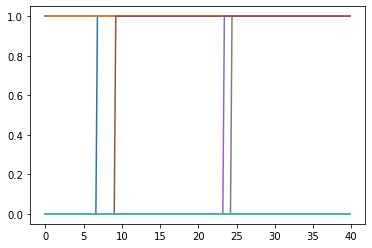

In [83]:
#The Discrimitation of some Items is negative and flat. 
#The Difficultys of the othere Items are rather close together
#Discrimination is highest in the lower ability area.
plot_iccs(a_hat, b_hat, range=[0, 40])

C:\Users\Jesper\AppData\Local\Temp\ipykernel_9548\2267335573.py:17: RuntimeWarning: overflow encountered in exp
  sigma = 1/(1+np.exp(-np.multiply(a,(ability_item_product))))
C:\Users\Jesper\AppData\Local\Temp\ipykernel_9548\2267335573.py:17: RuntimeWarning: overflow encountered in exp
  sigma = 1/(1+np.exp(-np.multiply(a,(ability_item_product))))
C:\Users\Jesper\AppData\Local\Temp\ipykernel_9548\2267335573.py:17: RuntimeWarning: overflow encountered in exp
  sigma = 1/(1+np.exp(-np.multiply(a,(ability_item_product))))
C:\Users\Jesper\AppData\Local\Temp\ipykernel_9548\2267335573.py:17: RuntimeWarning: overflow encountered in exp
  sigma = 1/(1+np.exp(-np.multiply(a,(ability_item_product))))
C:\Users\Jesper\AppData\Local\Temp\ipykernel_9548\2267335573.py:17: RuntimeWarning: overflow encountered in exp
  sigma = 1/(1+np.exp(-np.multiply(a,(ability_item_product))))
C:\Users\Jesper\AppData\Local\Temp\ipykernel_9548\2267335573.py:17: RuntimeWarning: overflow encountered in exp
  sigma = 1/(

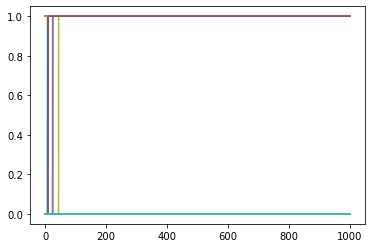

In [84]:
plot_iccs(a_hat, b_hat, range=[0, 1000])

In [85]:
sum(a_hat < 0)
#One third of the discrimination estimates is negative. 

19

## MMLE Method to estimate person and item parameters simultaniously with EM Algorithm

In [86]:
#Define some random starting values for the 2PL Model
b = np.random.normal(loc=0, scale=1, size = U.shape[1])
a = np.random.uniform(low=0, high=2, size = U.shape[1])

In [87]:
def complete_data_log_likelihood(ability_weight, correct_response_weight, a, b, quadratures, quadrature_probs):
    K = len(ability_weight) #Number of Quadratures or factors of the latent prior
    J = len(b) #Number of Items
    ICC_values = ICC(a,b, quadratures)
    log_likelihood = 0
    for j in range(0,J):
        #n_j = ability_weight[:,j] #scalar
        r_j = correct_response_weight[j, :] #vector: should be equal in length to # of Items
        log_likelihood += np.dot(r_j, np.log(ICC_values[:,j])) + np.dot(np.subtract(ability_weight, r_j), np.log((1-ICC_values[:,j]))) + np.dot(ability_weight*np.ones((1, K)), np.log(quadrature_probs))
    return(log_likelihood)

In [88]:
# def expected_ability_weights(response_data, ICC_values, expectation, current_parameters, prior_dist):
#     for response_pattern in response_data:
        

# def expected_correct_response_weights(response_data, ICC_values, expectation, current_parameters, prior_dist):
#     ...

def conditional_ability_probability(response_pattern, current_parameters, prior_dist):
    a_t, b_t = current_parameters
    quadratures, quadrature_dist = prior_dist
    K = len(quadratures)
    conditional_answer_probability = np.empty(shape=K)
    for k in range(0, K):
        conditional_answer_probability[k] = np.prod(np.power(ICC(a_t, b_t, quadratures[k]), response_pattern))*np.prod(np.power(1-ICC(a_t, b_t, quadratures[k]), 1-response_pattern))
    p_sum = np.sum(conditional_answer_probability)
    conditional_ability_p = [conditional_answer_probability[k]/p_sum for k in range(0, K)]
    return(conditional_ability_p)
        


def e_step_mmle(response_data, current_parameters, prior_dist):
    quadratures = prior_dist[0]
    a_t, b_t = current_parameters
    ICC_values = ICC(a_t, b_t, quadratures)
    #Calculate Expected Values
    N = response_data.shape[0]
    K = len(quadratures)
    c_a_p = np.empty(shape=(N,K))
    for i, response_pattern in enumerate(response_data.to_numpy()):
        c_a_p[i] = conditional_ability_probability(response_pattern, current_parameters, prior_dist)
    ability_weights = np.sum(np.array(c_a_p), axis=0) #There should be K ability weights
    correct_response_weights =  np.dot(np.transpose(response_data), np.array(c_a_p))#should be a K * J Matrix
    
    return(ability_weights, correct_response_weights)

In [89]:
from scipy.optimize import minimize

def m_step_mmle(expectation, current_parameters, prior_dist):
    ability_weight, correct_response_weight = expectation
    N, J = U.shape
    #Define negative log-likelihood in relation to x = (a, b)
    nll = lambda x: -1*complete_data_log_likelihood(ability_weight, correct_response_weight,
                                                     a=x[0:len(a)], b=x[len(a):len(x)], 
                                                     quadratures=prior_dist[0], quadrature_probs = prior_dist[1])
    a_t, b_t = current_parameters
    nll(np.concatenate((a_t,b_t), axis=0))
    res = minimize(nll, x0=np.concatenate((a_t,b_t), axis=0), method='Nelder-Mead') #BFGS
    a_hat = res.x[0:len(a_t)]
    b_hat = res.x[len(a_t): len(res.x)]
    return(a_hat, b_hat)

In [90]:
from scipy.stats import norm

def generate_prior_dist(loc, scale, K, dist=norm):
    prior_dist = dist(loc, scale)
    start_point = loc-2.5*scale
    end_point = loc+2.5*scale
    side_points = np.linspace(start_point, end_point, num=K+1)#np.arange(start_point, end_point, step=quadrature_width)
    quadratures = [(side_points[i]+side_points[i-1])/2 for i in range(1,len(side_points))]
    quadrature_dist = [prior_dist.cdf(side_points[i])-prior_dist.cdf(side_points[i-1]) for i in range(1, len(side_points))]
    quadrature_dist[0] = prior_dist.cdf(side_points[1])
    quadrature_dist[K-1] = 1-prior_dist.cdf(side_points[K-1])
    return(quadratures, quadrature_dist)

In [91]:
def em_algorithm(response_data, starting_parameters, prior_dist, e_step=e_step_mmle, m_step=m_step_mmle, stop_criterion=[0.01, 0.01]):
    """Basic formulation of the EM-Algorithm for estimimating Parameters for IRT

    Args:
        response_data (pd.DataFrame or np.array): Response data from Item's 
        starting_parameters (np.array): Initial Parameters to be handed over to the EM-steps. End-result might depend on these.
        e_step (function): Algorithm for calculating the current expected 
        m_step (function): Algorithm for finding the best paramaters given the current expectation. 
    """
    converged = False
    current_parameters = starting_parameters
    i = 0
    while (not converged) or i > 100:
        last_step_parameters = current_parameters
        expectation = e_step(response_data, current_parameters, prior_dist)
        current_parameters = m_step(expectation, current_parameters, prior_dist)
        parameter_diff = [np.sum(np.abs(current_parameters[i]-last_step_parameters[i])) for i in range(0, len(current_parameters))]
        if (np.sum(np.array(parameter_diff)>=np.array(stop_criterion)) == 0) and i >= 10:
            converged = True
        i = i+1
        log_likelihood = complete_data_log_likelihood(ability_weight=expectation[0], correct_response_weight=expectation[1], 
                                                    a=current_parameters[0], b=current_parameters[1], 
                                                    quadratures=prior_dist[0], quadrature_probs=prior_dist[1])
        print("Step: {0}: current parameter_diff: {1}, current data likelihood: {2}".format(i, parameter_diff, log_likelihood))
    return(current_parameters)


In [92]:
res = em_algorithm(response_data=U, starting_parameters=[a,b], prior_dist=generate_prior_dist(0, 1, 10))

Step: 1: current parameter_diff: [12.860657391781231, 30.7689380224531], current data likelihood: [-32541.27345761]
Step: 2: current parameter_diff: [6.141508766681812, 33.676433010045606], current data likelihood: [-30942.72231768]
Step: 3: current parameter_diff: [4.684652936655546, 16.072497558949248], current data likelihood: [-29923.61720343]
Step: 4: current parameter_diff: [4.003095313116558, 7.057372489089557], current data likelihood: [-29203.75030261]
Step: 5: current parameter_diff: [2.882593427931262, 6.776310319956741], current data likelihood: [-28680.33292043]
Step: 6: current parameter_diff: [2.097922371012397, 13.587721294465199], current data likelihood: [-28270.97287647]
Step: 7: current parameter_diff: [1.552788898622115, 12.980463673606385], current data likelihood: [-27964.69631527]
Step: 8: current parameter_diff: [1.6381901279914106, 12.939966168301222], current data likelihood: [-27737.86128118]
Step: 9: current parameter_diff: [1.5241846109527741, 8.6427476005

KeyboardInterrupt: 

In [93]:
#ICC's for EM-Result with standard Label
a_hat, b_hat = res

plot_iccs(a_hat, b_hat, range=[-5, 5])

ValueError: too many values to unpack (expected 2)

In [ ]:
alt_res = em_algorithm(response_data=alt_U, starting_parameters=[a,b], prior_dist=generate_prior_dist(0, 1, 10))

: 

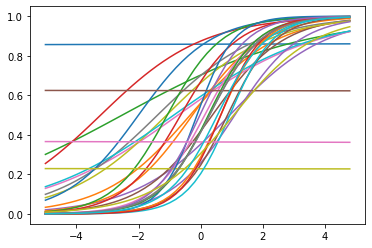

In [204]:
plot_iccs(alt_res[0], alt_res[1], range=[-5, 5])

### Fit the Person Parameters

In [ ]:
def answer_log_likelihood(theta, answer_vector, item_parameters):
    ICC_values = ICC(answer_vector[0], answer_vector[1], theta)
    log_likelihood = np.dot(answer_vector, np.log(ICC_values)) + np.dot((1-answer_vector), np.log(1-ICC_values))
    return(log_likelihood)

In [ ]:
from scipy.stats import norm

#The marginal likelihood estimate will discretise the integral over theta in order to make it tracktable
def marginal_uirt_loglikelihood(U, a, b):
    prior_dist = norm(loc = 0, scale = 1)
    theta_range = np.arange(-3, 3, step = 0.2)
    likelihoods = np.empty(shape=theta.shape)
    for i, u in enumerate(U.to_numpy()):
        prior_p = [prior_dist.pdf(theta_range[i])-prior_dist.pdf(theta_range[i-1]) for i in range(1, len(theta_range))]
        ICC_list = [ICC(a, b, theta) for i, theta in enumerate(theta_range[1:len(theta_range)])] 
        likelihoods[i] = sum([(np.dot(u, np.log(ICC_list[i])) + np.dot((1-u), np.log(1-ICC_list[i])))*prior_p[i] for i in range(0, len(ICC_list))])
        #likelihoods[i] = np.dot(u, np.log(ICC(a, b, theta[i]))) + np.dot(u, np.log(1-ICC(a, b, theta[i])))
    return(np.sum(likelihoods)) 

In [ ]:
marginal_uirt_loglikelihood(U, a, b)

-7905.601345094599

In [ ]:
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import NonlinearConstraint
from scipy.optimize import minimize

nll = lambda x: -1*marginal_uirt_loglikelihood(U, x[0:len(a)], x[len(a):len(x)])

#The Nelder-mead method is simplex based and does not need derivatives. To get better results other methods should be used. 
res = minimize(nll, x0=np.concatenate((a,b), axis=0), method='BFGS')
res

KeyboardInterrupt: 

In [ ]:
res2 = minimize(nll, x0=np.concatenate((a,b), axis=0), method='BFGS')
res2

C:\Users\Jesper\AppData\Local\Temp\ipykernel_35264\1333481343.py:11: RuntimeWarning: divide by zero encountered in log
  likelihoods[i] = sum([(np.dot(u, np.log(ICC_list[i])) + np.dot((1-u), np.log(1-ICC_list[i])))*prior_p[i] for i in range(0, len(ICC_list))])
C:\Users\Jesper\AppData\Local\Temp\ipykernel_35264\1752661859.py:4: RuntimeWarning: overflow encountered in exp
  sigma = 1/(1+np.exp(-np.multiply(a,(theta-b))))


KeyboardInterrupt: 

In [ ]:
np.concatenate((a,b), axis=0)

array([ 0.74990294,  0.23504653,  1.27111925,  1.49275862,  1.55112183,
        0.75224373,  1.14722591,  1.21183061,  0.56970465,  0.75403527,
        0.78706668,  1.43869164,  1.41453058,  0.01385877,  1.38064729,
        0.76937128,  0.38772602,  0.49315157,  0.8165009 ,  1.82201091,
        0.98180478,  0.36775436,  0.44861707,  0.39828443,  1.30742394,
        1.92578093,  1.37155048,  1.78237093,  1.37363628,  1.08059736,
        1.50522421,  0.65411747, -0.74011695,  0.75696314,  1.05139367,
       -0.94790114, -2.01552778,  0.34926321,  0.21021149,  1.12919114,
        1.40978134,  0.29165487, -0.28246801,  0.86904811,  1.55078554,
       -1.43717595,  1.30969737,  0.62160323,  2.04956534, -0.88025414,
       -0.38887585,  0.35135082, -1.37351094,  1.39605891, -1.37664169,
       -0.98754993, -0.66383097,  0.82497257,  1.37336465, -0.22043462])